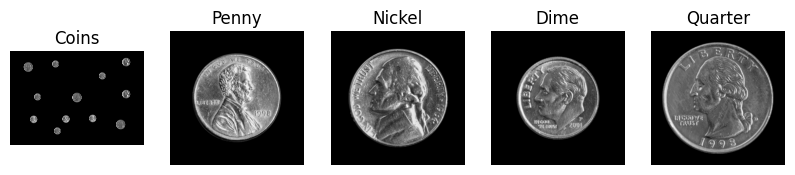

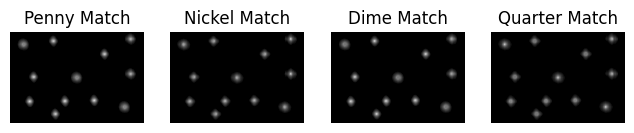

[[ 166 2892    1]
 [1002 2892    1]
 [1074  572    2]
 [1638 2016    0]
 [1962 1092    2]
 [1654 1316    0]
 [1662  472    0]
 [ 214 1044    2]
 [ 294  328    3]
 [ 526 2268    2]
 [1090 1604    3]
 [1794 2748    3]]
1.28


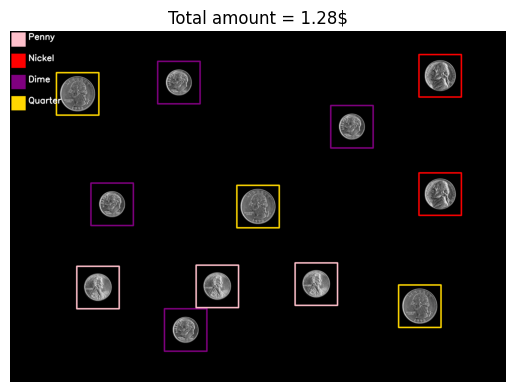

In [32]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

coins = cv.imread('images/coins.png', cv.IMREAD_GRAYSCALE)
assert coins is not None
p = cv.imread('images/Penny.png', cv.IMREAD_GRAYSCALE)
assert p is not None
n = cv.imread('images/Nickel.png', cv.IMREAD_GRAYSCALE)
assert n is not None
d = cv.imread('images/Dime.png', cv.IMREAD_GRAYSCALE)
assert d is not None
q = cv.imread('images/Quarter.png', cv.IMREAD_GRAYSCALE)
assert q is not None

plt.figure(figsize=(10, 10))
plt.subplot(1, 5, 1)
plt.imshow(coins, cmap='gray')
plt.title('Coins')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(p, cmap='gray')
plt.title('Penny')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(n, cmap='gray')
plt.title('Nickel')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(d, cmap='gray')
plt.title('Dime')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(q, cmap='gray')
plt.title('Quarter')
plt.axis('off')

plt.show()

# Template matching
p_r = cv.matchTemplate(coins, p, cv.TM_CCOEFF_NORMED)
n_r= cv.matchTemplate(coins, n, cv.TM_CCOEFF_NORMED)
d_r = cv.matchTemplate(coins, d, cv.TM_CCOEFF_NORMED)
q_r = cv.matchTemplate(coins, q, cv.TM_CCOEFF_NORMED)

# Display the template matching results
plt.figure(figsize=(10, 10))
plt.subplot(2, 5, 1)
plt.imshow(p_r, cmap='gray',vmin=0,vmax=1)
plt.title('Penny Match')
plt.axis('off')

plt.subplot(2, 5, 2)
plt.imshow(n_r, cmap='gray',vmin=0,vmax=1)
plt.title('Nickel Match')
plt.axis('off')

plt.subplot(2, 5, 3)
plt.imshow(d_r, cmap='gray',vmin=0,vmax=1)
plt.title('Dime Match')
plt.axis('off')

plt.subplot(2, 5, 4)
plt.imshow(q_r, cmap='gray',vmin=0,vmax=1)
plt.title('Quarter Match')
plt.axis('off')

plt.show()

stacked=np.stack(arrays=[p_r,n_r,d_r,q_r],axis=2)#stack each matched images on top of each other in a new axis
stacked.size

Color_rect = [
    (255, 192, 203),  # Pink
    (255, 0, 0),      # Red
    (128, 0, 128),    # Purple
    (255, 215, 0)     # Gold
]

template_names=['Penny', 'Nickel', 'Dime', 'Quarter']
amounts=[0.01,0.05,0.1,0.25]
w, h = n.shape # size of rectrangle
coins_color=cv.cvtColor(coins, cv.COLOR_GRAY2BGR)
#calculate the local maximum
coordinates = peak_local_max(stacked, exclude_border=0, min_distance=5, threshold_abs=0.7)# The threshold is set to 0.7 because the template matching process normalizes the result, producing values within the range [0,1]. The highest intensity value, which indicates the best matches, is close to 1.
print(coordinates)

total=0

#draw rectrangles
for i,coord in enumerate(coordinates):
    c=coord[2]#getting the index of the coin in coin list
    x,y=coord[:2]#getting coordinates of the ditected point
    cv.rectangle(coins_color,(y,x),(y+w,x+h), Color_rect[c],thickness=10)#draw the rectrangle
    total+=amounts[c]

# Adding legend to the image
legend_x, legend_y = 10, 10# cordinates of starting point of legend
legend_height = 150
for i, (name, color) in enumerate(zip(template_names, Color_rect)):
    cv.rectangle(coins_color, (legend_x, legend_y + i * legend_height), (legend_x + 100, legend_y + 100 + i * legend_height), color, thickness=-1)
    cv.putText(coins_color, name, (legend_x + 120, legend_y + 50 + i * legend_height), cv.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 5, cv.LINE_AA)

print(total)
plt.imshow(coins_color)
plt.title(f'Total amount = {total}$')
plt.axis('off')
plt.show()


Assumptions :
In peak local maximum ,threshold_abs parameter (set to 0.7) assumes that only peaks with values above this threshold are considered valid detections, ensuring that detected coin positions are reliable and correspond to strong matches in the template matching results.                                                                                                                             
Assumes stacked template matching results allows for pinpointing potential coin positions based on peak intensity values in the correlation images.                                                                           
Assume that coins in the coins image are not overlapping and they are clearly visible.